## <span style="font-family: monospace;">Gender</span>
First, I analyze the differences men ♂️ and women ♀️ face in the judicial system. We attempt to answer the following,

1. How women are often different types of judges compared to men
2. How different states have more women in court than in other states
3. Do women plead guilty more often that men
4. Are more men involved in domestic violence cases as compared to women

In [2]:
# libraries
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

### <span style="font-family: monospace;">Part 1</span>
> How women are often different types of judges compared to men

Here, we compare how women occupy different positions of power as judges compared to men.

In [12]:
# import the judges data
judges_df = pd.read_csv('../data/judges_clean.csv')

In [13]:
male_filt = judges_df['female_judge'] == '0 nonfemale'
female_filt = judges_df['female_judge'] == '1 female'

In [14]:
judges_df['female_judge'].value_counts()

0 nonfemale      67540
1 female         27202
-9998 unclear     3735
Name: female_judge, dtype: int64

In [15]:
judges_df[female_filt]['judge_position'].value_counts(normalize=True)

chief judicial magistrate      0.188589
civil judge senior division    0.164620
district and sessions court    0.128630
civil judge junior division    0.126755
civil court                    0.053084
                                 ...   
sub judge-iv                   0.000037
sub judge viii                 0.000037
sub-judge 3rd                  0.000037
munsif 1st                     0.000037
5-additional district judge    0.000037
Name: judge_position, Length: 234, dtype: float64

In [6]:
judges_df[male_filt]['judge_position'].value_counts(normalize=True)

district and sessions court                 0.240924
chief judicial magistrate                   0.134646
civil judge senior division                 0.132662
civil judge junior division                 0.092952
civil court                                 0.047394
                                              ...   
a.d.j. x                                    0.000015
5-judicial magistrate court                 0.000015
5-munsiff                                   0.000015
v-j.m. ist class-cum-addl. munsif           0.000015
3-additional civil judge senior division    0.000015
Name: judge_position, Length: 546, dtype: float64

### <span style="font-family: monospace;">Part 1 Results</span>
We observe that there are 2.5 times more men than women in court however, a greater percentage of men work in district courts while women tend to work in higher courts. A higher percentage of females work for civil courts compared to men.

1. 11.24% more men work holding the position `district and sessions court`.
2. 5% more women work holding the position `chief judicial magistrate`.
3. 3% more women work as seniors in civil courts holding the position `civil judge senior division`.

Below, I plot the results.

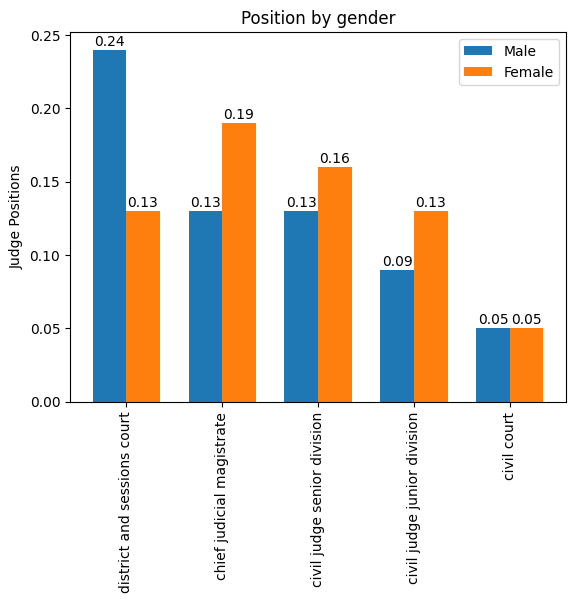

In [32]:
# plots
positions = list(judges_df[male_filt]['judge_position'].value_counts().index)[:5]
judges_female_position_percentages = [
    round(judges_df[female_filt]['judge_position'].value_counts(normalize=True)[position], 2)
    for position in positions
]
judges_male_position_percentages = [
    round(judges_df[male_filt]['judge_position'].value_counts(normalize=True)[position], 2)
    for position in positions
]

x = np.arange(len(positions)) # label locations
width = 0.35 # width of bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, judges_male_position_percentages, width, label='Male')
rects2 = ax.bar(x + width/2, judges_female_position_percentages, width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Judge Positions')
ax.set_title('Position by gender')
ax.set_xticks(x, positions, rotation=90)
ax.legend()

ax.bar_label(rects1, padding=1)
ax.bar_label(rects2, padding=1)

plt.show()

### <span style="font-family: monospace;">Part 2</span>
> How different states have more women in court than in other states

Here, we compare the regional distribution of women in court across India.

In [17]:
# import state data
states_df = pd.read_csv('../data/keys/cases_state_key.csv')

In [18]:
male_filt = judges_df['female_judge'] == '0 nonfemale'
female_filt = judges_df['female_judge'] == '1 female'

In [19]:
# we iterate over every state and count the number of male judges
# and female judges for that state
state_mf_ratio = {}
for code, row in states_df.groupby(by='state_code').max().iterrows():
    name = row['state_name']

    filt = female_filt & (judges_df['state_code'] == code)
    nfemale = judges_df[filt].shape[0]

    filt = male_filt & (judges_df['state_code'] == code)
    nmale = judges_df[filt].shape[0]

    if nmale == 0 and nfemale == 0:
        continue

    state_mf_ratio[name] = {
        'm': nmale,
        'f': nfemale,
        'm_mf': round((nmale / (nmale + nfemale)) * 100, 2),
        'f_mf': round((nfemale / (nmale + nfemale)) * 100, 2),
    }

In [20]:
# now we sort by states with the highest female ratio
state_fratio = []
for state, stat in state_mf_ratio.items():
    state_fratio.append((stat['f_mf'], state))

sorted(state_fratio, reverse=True)

[(64.86, 'Mizoram'),
 (62.16, 'Meghalaya'),
 (58.79, 'Sikkim'),
 (50.62, 'Goa'),
 (50.0, 'Manipur'),
 (45.44, 'Gujarat'),
 (41.28, 'Punjab'),
 (39.55, 'Assam'),
 (39.33, 'Uttarakhand'),
 (36.43, 'Chandigarh'),
 (35.81, 'Tamil Nadu'),
 (35.5, 'Haryana'),
 (35.28, 'Delhi'),
 (35.11, 'Andhra Pradesh'),
 (34.54, 'Telangana'),
 (33.33, 'Chhattisgarh'),
 (33.15, 'Orissa'),
 (32.05, 'Karnataka'),
 (31.58, 'Rajasthan'),
 (30.33, 'West Bengal'),
 (28.34, 'Maharashtra'),
 (28.24, 'Kerala'),
 (28.09, 'Himachal Pradesh'),
 (28.08, 'Tripura'),
 (21.92, 'Madhya Pradesh'),
 (21.04, 'Uttar Pradesh'),
 (16.46, 'Jammu and Kashmir'),
 (9.99, 'Jharkhand'),
 (6.67, 'Bihar')]

In [34]:
# work to plot data
shp_gdf = gpd.read_file('../assets/india_plot/indian_states.shp')
shp_gdf.at[23, 'st_nm'] = 'Delhi'

data = []
for index, row in shp_gdf.iterrows():
    ratio = 0
    for state in state_fratio:
        if state[1][:5] == row['st_nm'][:5]:
            ratio = state[0]
            break

    data.append(ratio)

shp_gdf['female_male_ratio'] = data

### <span style="font-family: monospace;">Part 2 Results</span>
Eastern states seem to involve women in court the most, sourthern states follow and northern states incorporate women in the legal system least.

<span style="font-family: monospace;">
Note: For some eastern states that show 0 as the ratio, these states had no data and thus no analysis could be done on them.
</span>

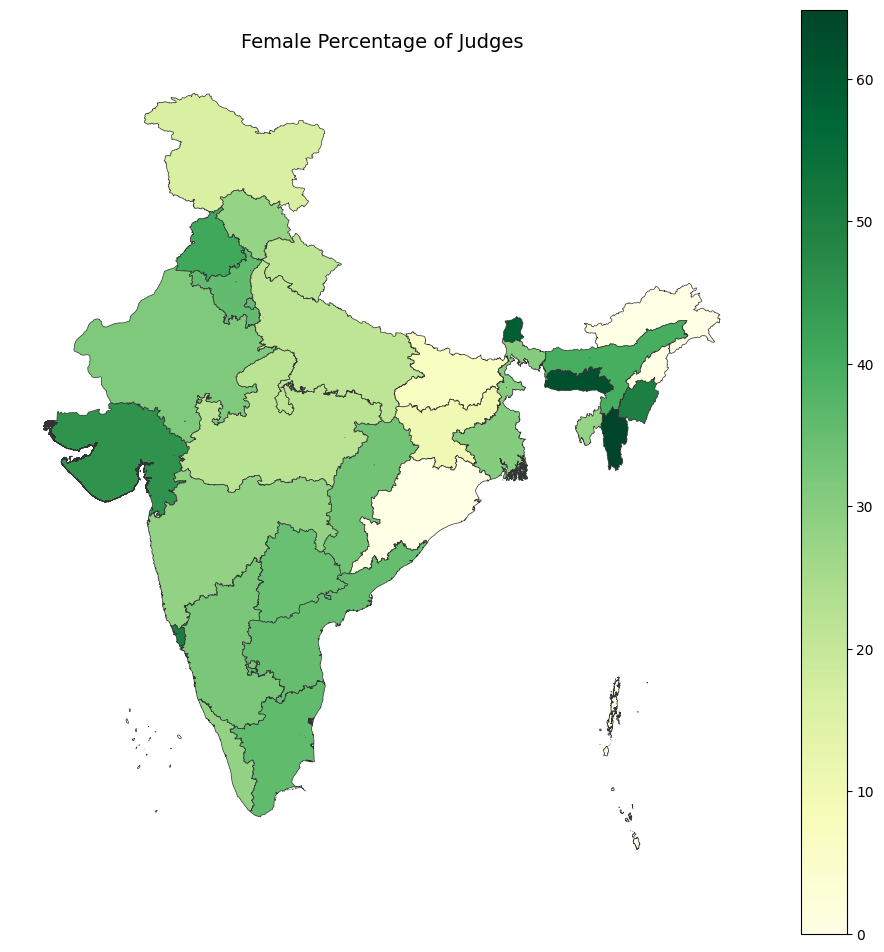

In [60]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Female Percentage of Judges',
             fontdict={'fontsize': '14', 'fontweight': '2'})

fig = shp_gdf.plot(column='female_male_ratio',
                   cmap='YlGn', linewidth=0.5,
                   ax=ax, edgecolor='0.2',
                   legend=True)

### <span style="font-family: monospace;">Part 3</span>
> Do women plead guilty more often that men

In cases where the defendant pleads guilty, did women plead guilty more often than men? This kind of statistic has many reasons that I won't hypothesis but it is important to know.

To find this statistic, we look at the disposition of cases with the `disp_name` column and use the `female_defendant` column to identify the gender of the defendant. To do this, we loop over all years and all cases, this is the first time now that we will be working with large files, to handle them; I chunk the file reading at most `CHUNK_SIZE` rows at once.

In [38]:
CHUNK_SIZE = 1_000_000
years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

In [42]:
# import disposition data
dispositions_df = pd.read_csv('../data/keys/disp_name_key.csv')

In [43]:
# now we find 'plead guilty' cases
dispositions_df.sort_values(by='count', ascending=False)

,year,disp_name,disp_name_s,count
436,2018,27,disposition var missing,6338472
384,2017,27,disposition var missing,4521012
332,2016,27,disposition var missing,3260488
280,2015,26,disposition var missing,2259042
229,2014,26,disposition var missing,1607071
...,...,...,...,...
418,2018,9,bail order,30
60,2011,10,bail rejected,7
9,2010,10,bail rejected,6
366,2017,9,bail order,6


In [45]:
# notice, most dispositions are missing, we drop these values
filt = ~dispositions_df['disp_name_s'].str.contains('var missing')
dispositions_df = dispositions_df[filt]

# we now find guilty dispositions
# (notice) disp_name == 38 or disp_name == 37 for plead guilty cases
plead_guilty_filt = dispositions_df['disp_name_s'].str.lower() == 'plead guilty'
dispositions_df[plead_guilty_filt].sort_values(by='count', ascending=False)

,year,disp_name,disp_name_s,count
343,2016,38,plead guilty,283364
291,2015,37,plead guilty,274034
395,2017,38,plead guilty,265563
447,2018,38,plead guilty,233732
240,2014,37,plead guilty,211634
189,2013,37,plead guilty,110164
138,2012,37,plead guilty,52895
87,2011,37,plead guilty,33190
36,2010,37,plead guilty,24872


In [47]:
%%time
plead_guilty_male = 0
plead_guilty_female = 0
total_cases_male = 0
total_cases_female = 0

for year in years:
    cases_df = pd.read_csv(f'../data/cases/cases_{year}.csv',
                           chunksize=CHUNK_SIZE,
                           iterator=True,
                           low_memory=False)

    for df in cases_df:
        pg_filt = (df['disp_name'] == 37) | (df['disp_name'] == 38)
        male_filt = (df['female_defendant'] == '0 male')
        female_filt = (df['female_defendant'] == '1 female')

        total_cases_male += df[male_filt].shape[0]
        total_cases_female += df[female_filt].shape[0]
 
        plead_guilty_male += df[pg_filt & male_filt].shape[0]
        plead_guilty_female += df[pg_filt & female_filt].shape[0]

        print('.', end='')

print()
print(plead_guilty_male, total_cases_male)
print(plead_guilty_female, total_cases_female)

......................................................................................
1545814 54124912
180506 9585817
CPU times: total: 4min 30s
Wall time: 4min 30s


### <span style="font-family: monospace;">Part 3 Results</span>
    We notice, although marginally, men plead guilty more often by 1%. There is no conclusion that can be made from this alone and thus I conclude that both men and women plead guilty equally in court which might go against what one thinks.

In [52]:
print(
    round(plead_guilty_male / total_cases_male, 8) * 100,
    round(plead_guilty_female / total_cases_female, 8) * 100
)

2.856012 1.883053


### <span style="font-family: monospace;">Part 4</span>
> Are more men involved in domestic violence cases as compared to women

Domestic violence is usually associated with men, domestic violence involving women as the violent member is seen as rare and uncommon but is this common judgement true?

For this analysis, we use the `type_name` column to identify the type of case. Chunking is necessary again as the files are too large to fit into RAM.

In [53]:
# we import case type details
types_df = pd.read_csv('../data/keys/type_name_key.csv')

In [54]:
types_df.sort_values(by='count', ascending=False)

,year,type_name,type_name_s,count
56157,2018,977.0,cc,900758
48605,2017,981.0,cc,899445
41170,2016,929.0,cc,895703
33719,2015,956.0,cc,787564
26503,2014,915.0,cc,766294
...,...,...,...,...
30102,2014,4514.0,misscellaneous,1
18311,2012,6631.0,u.p.u.b. misc,1
56551,2018,1371.0,cm 41,1
56550,2018,1370.0,cm 38,1


In [55]:
domestic_filt = types_df['type_name_s'].str.contains('domestic violence', na=False)
types_df[domestic_filt].head()

,year,type_name,type_name_s,count
1744,2010,1745.0,domestic violence,81
1745,2010,1746.0,domestic violence ac,12
1746,2010,1747.0,domestic violence act 2005,850
1747,2010,1748.0,domestic violence act.,122
1748,2010,1749.0,domestic violence cases,38


In [58]:
%%time
domestic_violence_male = 0
domestic_violence_female = 0
total_cases_male = 0
total_cases_female = 0

for year in years:
    cases_df = pd.read_csv(f'../data/cases/cases_{year}.csv',
                           chunksize=CHUNK_SIZE,
                           iterator=True,
                           low_memory=False)

    for df in cases_df:
        merged_df = pd.merge(df, types_df, on='type_name', how='inner')
        
        domestic_violence_filt = merged_df['type_name_s'].str.contains('domestic violence')    
        male_defendant_filt = (merged_df['female_defendant'] == '0 male')
        female_defendant_filt = (merged_df['female_defendant'] == '1 female')

        total_cases_male += merged_df[male_defendant_filt].shape[0]
        total_cases_female += merged_df[female_defendant_filt].shape[0]
 
        domestic_violence_male += merged_df[domestic_violence_filt & male_defendant_filt].shape[0]
        domestic_violence_female += merged_df[domestic_violence_filt & female_defendant_filt].shape[0]

        print('.', end='')

print()
print(domestic_violence_male, total_cases_male)
print(domestic_violence_female, total_cases_female)

......................................................................................
1214496 464939058
190376 83509503
CPU times: total: 14min 29s
Wall time: 14min 32s


### <span style="font-family: monospace;">Part 4 Results</span>
More men appear in court for domestic violence by 3.32% which in absolute numbers is quite substantial.

In [59]:
print(
    round(domestic_violence_male / total_cases_male, 8) * 100,
    round(domestic_violence_female / total_cases_female, 8) * 100
)

0.261216 0.227969


## Insights
* Women hold higher positions in court compared to men
* Northern states have fewer women involved in court
* Women do no plead guilty more often than men in court
* More men appear in court for domestic violence than women